### Data Import:-

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px


About DataSet:

I have to perform the following tasks:

#### a) Data  validation & cleaning:-
            i) Reading CSV file:
            ii) Validate the structure and format of the data. 
            iii) Handle missing(null) values, outliers, and any inconsistencies from the  dataset.
            iv) ensure the data integrity and accuracy.

##### i) Reading CSV file:

In [2]:
df = pd.read_csv("C:\\Users\\BHOJANNA\\Documents\\Task 1 NSEI.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0
1,2013-04-08,5550.500000,5569.200195,5537.049805,5542.950195,5542.950195,97000.0
2,2013-04-09,5568.750000,5603.049805,5487.000000,5495.100098,5495.100098,138200.0
3,2013-04-10,5536.250000,5569.250000,5477.200195,5558.700195,5558.700195,128600.0
4,2013-04-11,5601.649902,5610.649902,5542.850098,5594.000000,5594.000000,146800.0


##### ii)  Validate the structure and format of the data. 

In [3]:
df.shape, df.size

((2713, 7), 18991)

In [4]:
# To check information all columns & data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2699 non-null   float64
 2   High       2699 non-null   float64
 3   Low        2699 non-null   float64
 4   Close      2699 non-null   float64
 5   Adj Close  2699 non-null   float64
 6   Volume     2699 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.5+ KB


In [5]:
# To check Column names in the data:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

##### iii) Handle missing(null) values, outliers, and any inconsistencies from the  dataset.

In [7]:
# To Check for missing values in the data:
df.isnull().sum()


Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [8]:
# df.describe()

* fill the nan value in the all given columns dataset:

In [9]:
df['Open'] = df['Open'].replace(np.nan,df.value_counts().mean())

In [10]:
df['High'] = df['High'].replace(np.nan,df.value_counts().mean())

In [11]:
df['Low'] = df['Low'].replace(np.nan,df.value_counts().mean())

In [12]:
df['Close'] = df['Close'].replace(np.nan,df.value_counts().mean())

In [13]:
df['Adj Close'] = df['Adj Close'].replace(np.nan,df.value_counts().mean())

In [14]:
df['Volume'] = df['Volume'].replace(np.nan,df.value_counts().mean())

In [15]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
df.value_counts()

Date        Open          High          Low           Close         Adj Close     Volume  
2013-04-05  5568.100098   5577.299805   5534.700195   5553.250000   5553.250000   137500.0    1
2020-08-17  11248.900391  11267.099609  11144.500000  11247.099609  11247.099609  634000.0    1
2020-08-05  11155.750000  11225.650391  11064.049805  11101.650391  11101.650391  667600.0    1
2020-08-06  11185.700195  11256.799805  11127.299805  11200.150391  11200.150391  600400.0    1
2020-08-07  11186.650391  11231.900391  11142.049805  11214.049805  11214.049805  452600.0    1
                                                                                             ..
2016-12-13  8196.150391   8228.849609   8155.799805   8221.799805   8221.799805   184000.0    1
2016-12-14  8229.349609   8229.400391   8165.100098   8182.450195   8182.450195   144600.0    1
2016-12-15  8128.399902   8225.900391   8121.950195   8153.600098   8153.600098   181800.0    1
2016-12-16  8178.200195   8178.700195   8127.

In [17]:
df['Open'].unique()

array([ 5568.100098,  5550.5     ,  5568.75    , ..., 22458.800781,
       22385.699219, 22592.099609])

* To Handle outliers and inconsistencies:

*Box Plot Open

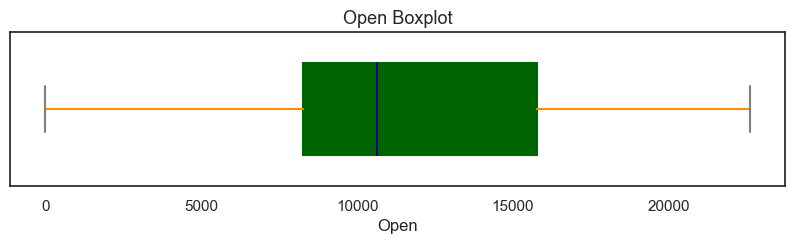

In [18]:
sns.set(style='white')
plt.figure(figsize=(10, 2))

custom_colors = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

sns.boxplot(x=df['Open'], 
            boxprops=dict(color=custom_colors["boxes"]),
            whiskerprops=dict(color=custom_colors["whiskers"]),
            medianprops=dict(color=custom_colors["medians"]),
            capprops=dict(color=custom_colors["caps"]),
            width=.6)

plt.title('Open Boxplot', fontsize=13)
plt.xlabel('Open')
plt.show()

In [19]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for index, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(index)
            print(dataframe.loc[index])

    return outliers
     

outliers = detect_outliers(df, df["Open"])  

Date         2014-01-01
Open                1.0
High                1.0
Low                 1.0
Close               1.0
Adj Close           1.0
Volume              1.0
Name: 182, dtype: object
Date         2014-02-17
Open                1.0
High                1.0
Low                 1.0
Close               1.0
Adj Close           1.0
Volume              1.0
Name: 215, dtype: object
Date         2014-03-22
Open                1.0
High                1.0
Low                 1.0
Close               1.0
Adj Close           1.0
Volume              1.0
Name: 238, dtype: object
Date         2014-04-24
Open                1.0
High                1.0
Low                 1.0
Close               1.0
Adj Close           1.0
Volume              1.0
Name: 259, dtype: object
Date         2014-10-15
Open                1.0
High                1.0
Low                 1.0
Close               1.0
Adj Close           1.0
Volume              1.0
Name: 376, dtype: object
Date         2015-01-01
Open       

In [20]:
# display rows where outlier is present for the Open column value
# display(outliers)

In [21]:
# Display the number of values in the list
display(f"The list has {len(outliers)} outliers in Open column of dataframe data")

'The list has 97 outliers in Open column of dataframe data'

*Box Plot Volume:

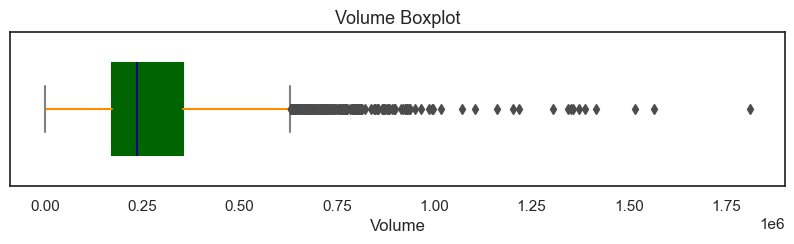

In [22]:
sns.set(style='white')
plt.figure(figsize=(10, 2))

custom_colors = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

sns.boxplot(x=df['Volume'], 
            boxprops=dict(color=custom_colors["boxes"]),
            whiskerprops=dict(color=custom_colors["whiskers"]),
            medianprops=dict(color=custom_colors["medians"]),
            capprops=dict(color=custom_colors["caps"]),
            width=.6)

plt.title('Volume Boxplot', fontsize=13)
plt.xlabel('Volume')
plt.show()

In [23]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for index, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(index)
            print(dataframe.loc[index])

    return outliers
     

outliers = detect_outliers(df, df["Volume"]) 

Date           2018-09-21
Open         11271.299805
High         11346.799805
Low          10866.450195
Close        11143.099609
Adj Close    11143.099609
Volume           719000.0
Name: 1347, dtype: object
Date           2018-11-29
Open         10808.700195
High         10883.049805
Low          10782.349609
Close        10858.700195
Adj Close    10858.700195
Volume           691300.0
Name: 1392, dtype: object
Date           2019-08-27
Open         11106.549805
High             11141.75
Low               11049.5
Close        11105.349609
Adj Close    11105.349609
Volume           685600.0
Name: 1573, dtype: object
Date           2019-09-11
Open              11028.5
High         11054.799805
Low          11011.650391
Close        11035.700195
Adj Close    11035.700195
Volume           687100.0
Name: 1582, dtype: object
Date           2019-09-20
Open         10746.799805
High         11381.900391
Low               10691.0
Close        11274.200195
Adj Close    11274.200195
Volume      

In [24]:
# number of values in the list
display(f"The list has {len(outliers)} outliers in Volume column of dataframe data")

'The list has 136 outliers in Volume column of dataframe data'

Box Plot in outliers:The same length outliers in columns (Open,High,Low,Close,Adj close) is 97 but different one collumn of list outliers length (Vollume) is 136

##### iv) Ensure data integrity and accuracy.

In [25]:
duplicate_rows = df[df.duplicated(subset = 'Date', keep = False)]
duplicate_rows

,Date,Open,High,Low,Close,Adj Close,Volume


In [26]:
# sorting by first name 
df['Date'].sort_values() 
# bool_series = df["Date"].duplicated() 

0       2013-04-05
1       2013-04-08
2       2013-04-09
3       2013-04-10
4       2013-04-11
           ...    
2708    2024-03-28
2709    2024-04-01
2710    2024-04-02
2711    2024-04-03
2712    2024-04-04
Name: Date, Length: 2713, dtype: object

In [27]:
# remove the duplicate data in df
duplicate_rows = df[df.duplicated()]


remove_duplicates = df.drop_duplicates()

remove_duplicates

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0
1,2013-04-08,5550.500000,5569.200195,5537.049805,5542.950195,5542.950195,97000.0
2,2013-04-09,5568.750000,5603.049805,5487.000000,5495.100098,5495.100098,138200.0
3,2013-04-10,5536.250000,5569.250000,5477.200195,5558.700195,5558.700195,128600.0
4,2013-04-11,5601.649902,5610.649902,5542.850098,5594.000000,5594.000000,146800.0
...,...,...,...,...,...,...,...
2708,2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500.0
2709,2024-04-01,22455.000000,22529.949219,22427.750000,22462.000000,22462.000000,0.0
2710,2024-04-02,22458.800781,22497.599609,22388.150391,22453.300781,22453.300781,289500.0
2711,2024-04-03,22385.699219,22521.099609,22346.500000,22434.650391,22434.650391,309600.0


#### b) Stock Analysis: 
    i) • Calculate basic statistical measures such as mean, median, standard deviation, etc., for 
    each column (Date, Open, High, Low, Close, Adj Close, Volume). 
    ii) • Visualize the historical trends of the stock using appropriate plots (e.g., line plots, 
    candlestick plots). 
    iii) • Conduct exploratory data analysis to identify patterns, trends, and anomalies in the data. 
    iv) • Compute correlations between different variables and assess their significance. 

##### i) • Calculate basic statistical measures
such as mean, median, standard deviation, etc., for each column (Date, Open, High, Low, Close, Adj Close, Volume). 

In [28]:
# remove_duplicate is converted into store in data variable
data = remove_duplicates

In [29]:
data.shape

(2713, 7)

In [30]:
# More than Two decimal into two decimal value:
data[['Open','High','Low','Close','Adj Close','Volume']] = data[['Open','High','Low','Close','Adj Close','Volume']].round(2)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-05,5568.10,5577.30,5534.70,5553.25,5553.25,137500.0
1,2013-04-08,5550.50,5569.20,5537.05,5542.95,5542.95,97000.0
2,2013-04-09,5568.75,5603.05,5487.00,5495.10,5495.10,138200.0
3,2013-04-10,5536.25,5569.25,5477.20,5558.70,5558.70,128600.0
4,2013-04-11,5601.65,5610.65,5542.85,5594.00,5594.00,146800.0
...,...,...,...,...,...,...,...
2708,2024-03-28,22163.60,22516.00,22163.60,22326.90,22326.90,410500.0
2709,2024-04-01,22455.00,22529.95,22427.75,22462.00,22462.00,0.0
2710,2024-04-02,22458.80,22497.60,22388.15,22453.30,22453.30,289500.0
2711,2024-04-03,22385.70,22521.10,22346.50,22434.65,22434.65,309600.0


In [31]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11686.747881,11741.582694,11612.415905,11678.733727,11678.733727,2.971421e+05
std,4439.997638,4455.171665,4418.354092,4438.663670,4438.663670,1.942036e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,8271.700000,8321.900000,8217.150000,8266.450000,8266.450000,1.713000e+05
50%,10645.100000,10698.350000,10586.800000,10628.500000,10628.500000,2.364000e+05
75%,15755.050000,15820.800000,15671.450000,15740.100000,15740.100000,3.553000e+05
max,22592.100000,22619.000000,22430.000000,22514.650000,22514.650000,1.811000e+06


In [32]:
data['Open'].describe()

count     2713.000000
mean     11686.747881
std       4439.997638
min          1.000000
25%       8271.700000
50%      10645.100000
75%      15755.050000
max      22592.100000
Name: Open, dtype: float64

In [33]:
data['High'].unique()

array([ 5577.3 ,  5569.2 ,  5603.05, ..., 22497.6 , 22521.1 , 22619.  ])

In [34]:
data['Low'].unique()

array([ 5534.7 ,  5537.05,  5487.  , ..., 22388.15, 22346.5 , 22303.8 ])

In [35]:
data['Close'].unique()

array([ 5553.25,  5542.95,  5495.1 , ..., 22453.3 , 22434.65, 22514.65])

In [36]:
data['Adj Close'].unique()

array([ 5553.25,  5542.95,  5495.1 , ..., 22453.3 , 22434.65, 22514.65])

In [37]:
data['Volume'].unique()

array([137500.,  97000., 138200., ..., 289500., 309600., 401000.])

#### ii) Visualize the historical trends of the stock 
using appropriate plots (e.g., line plots, 
candlestick plots).

In [38]:
data.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-05,5568.1,5577.3,5534.7,5553.25,5553.25,137500.0


In [39]:
# data.plot()

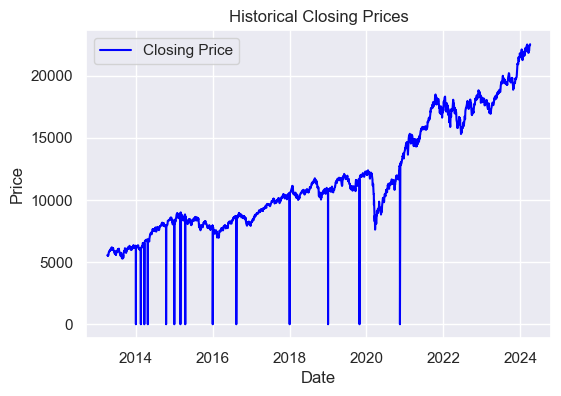

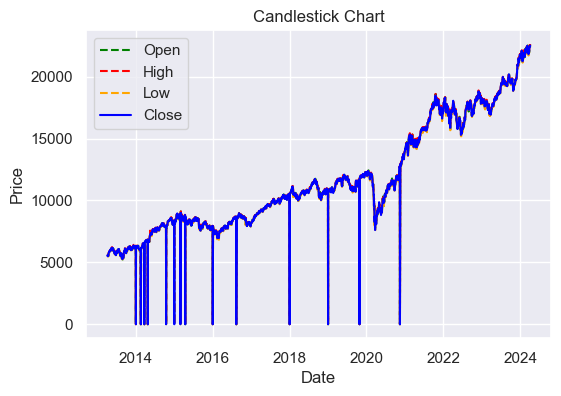

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Plot line chart of closing prices
plt.figure(figsize=(6, 4))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot candlestick chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(data['Date'], data['Open'], label='Open', color='green', linestyle='--')
ax.plot(data['Date'], data['High'], label='High', color='red', linestyle='--')
ax.plot(data['Date'], data['Low'], label='Low', color='orange', linestyle='--')
ax.plot(data['Date'], data['Close'], label='Close', color='blue')
ax.set_title('Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True)
plt.show()


    -analyse these chart (date vs prices) prices up & down per year. 
    -increasing the prices per year not more than decreases stock prices

* Distribution of Prices

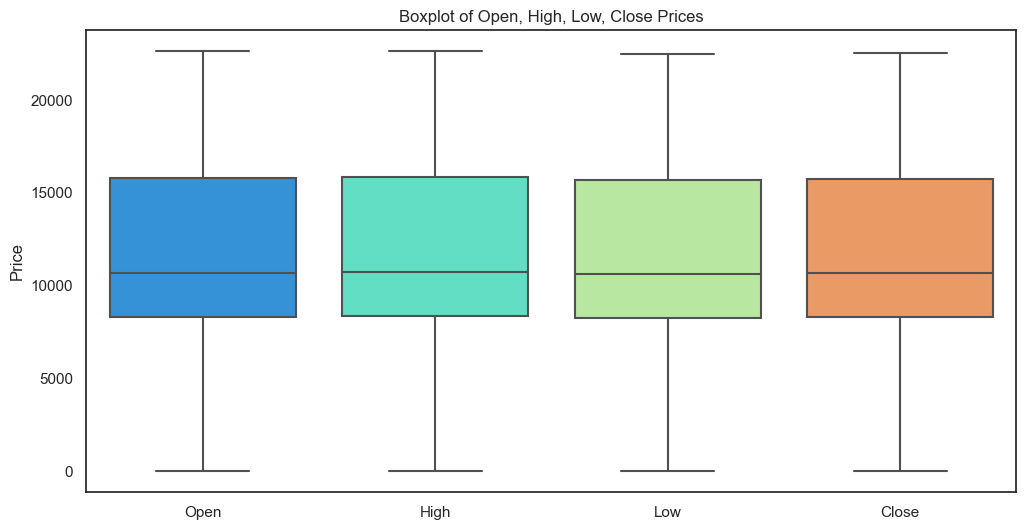

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']],palette = 'rainbow')
plt.title('Boxplot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.show()


 Distribution plot price analysis:

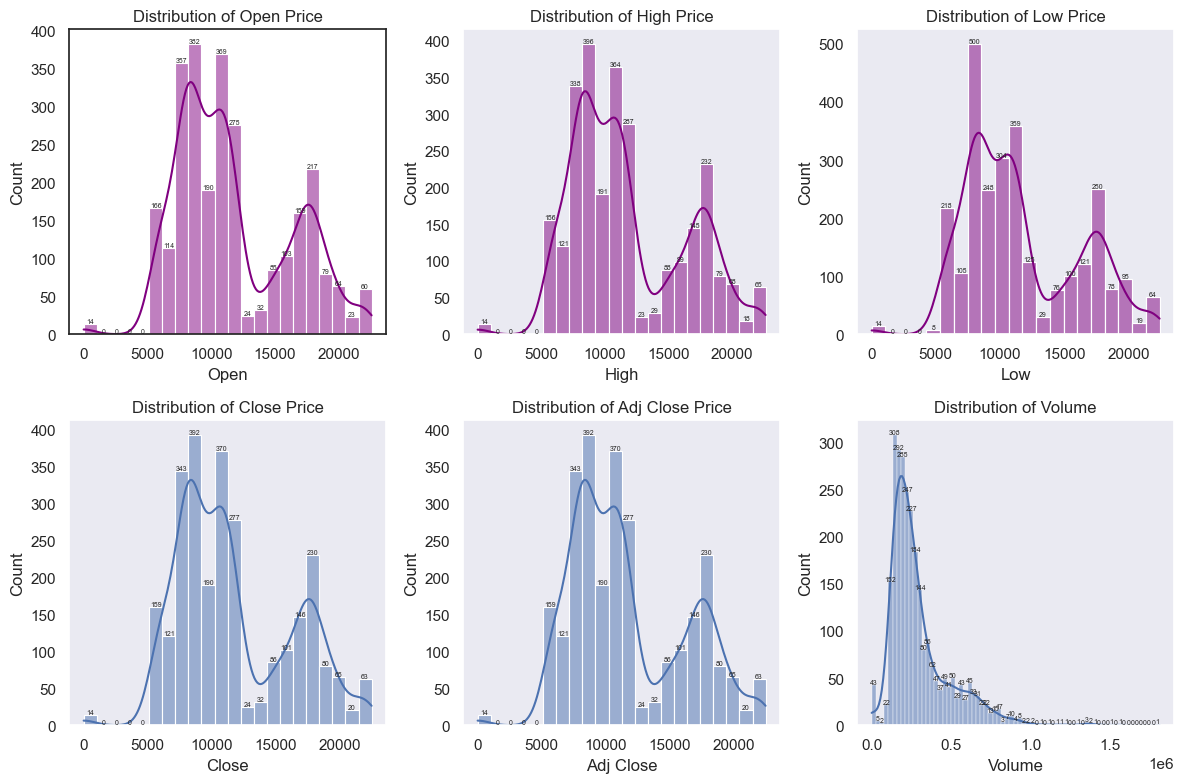

In [43]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.set(style = 'dark')
ax1 = sns.histplot(data['Open'], kde=True, color = 'purple')
plt.title('Distribution of Open Price')
for i in ax1.containers:
    ax1.bar_label(i,fontsize = 5)

plt.subplot(2, 3, 2)
ax2 = sns.histplot(data['High'], kde=True,color = 'purple')
plt.title('Distribution of High Price')
ax2.bar_label(ax2.containers[0], fontsize=5)

plt.subplot(2, 3, 3)
ax3 = sns.histplot(data['Low'], kde=True,color = 'purple')
plt.title('Distribution of Low Price')
ax3.bar_label(ax3.containers[0], fontsize=5)

plt.subplot(2, 3, 4)
ax4 = sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Price')
for i in ax4.containers:
    ax4.bar_label(i,fontsize = 5)

plt.subplot(2, 3, 5)
ax5 = sns.histplot(data['Adj Close'], kde=True)
plt.title('Distribution of Adj Close Price')
for i in ax5.containers:
    ax5.bar_label(i,fontsize = 5)

plt.subplot(2, 3, 6)
ax6 = sns.histplot(data['Volume'], kde=True)
plt.title('Distribution of Volume')
for i in ax6.containers:
    ax6.bar_label(i,fontsize = 5)

plt.tight_layout()
plt.show()


##### iv) Compute correlations between different variables and assess their significance.

In [44]:
data.corr()

C:\Users\BHOJANNA\AppData\Local\Temp\ipykernel_19200\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999902,0.999867,0.999761,0.999761,0.224740
High,0.999902,1.000000,0.999826,0.999887,0.999887,0.227901
Low,0.999867,0.999826,1.000000,0.999891,0.999891,0.219945
Close,0.999761,0.999887,0.999891,1.000000,1.000000,0.223990
Adj Close,0.999761,0.999887,0.999891,1.000000,1.000000,0.223990
Volume,0.224740,0.227901,0.219945,0.223990,0.223990,1.000000


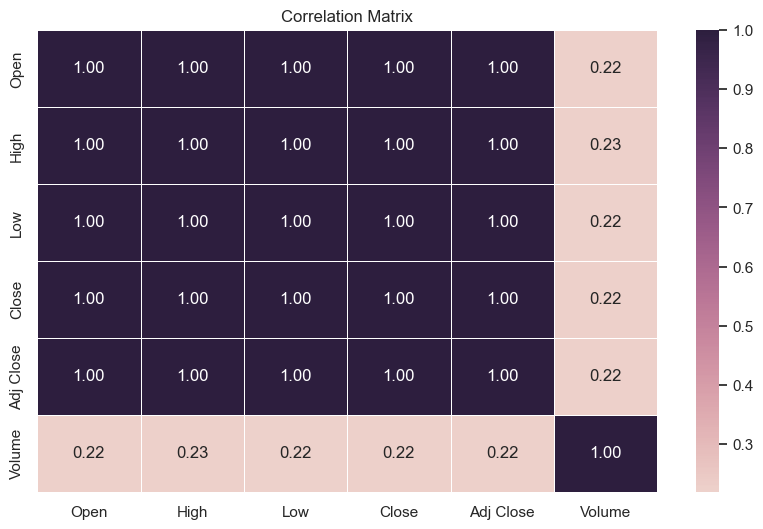

In [45]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth = 0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<Axes: >

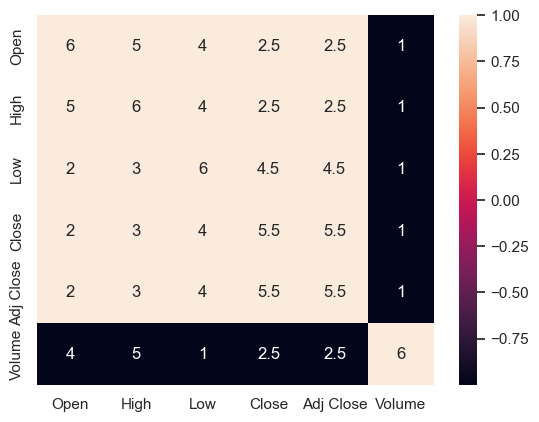

In [46]:
sns.heatmap(correlation_matrix.corr(), annot=correlation_matrix.corr().rank(axis="columns"))

#### c) Predictive Modeling: 

    • Utilize machine learning techniques (e.g., linear regression, ARIMA, LSTM) to build a 
    predictive model for the stock. 
    • Split the data into training and testing sets. 
    • Determine if there are any seasonal patterns or cyclical trends in the stock's behavior. 
    • Apply time series decomposition techniques to isolate seasonal, trend, and residual 
    components. 
    • Train the model using historical data. 
    • Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE). 
    • Generate predictions for future stock prices based on the trained model.

In [47]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-05,5568.10,5577.30,5534.70,5553.25,5553.25,137500.0
1,2013-04-08,5550.50,5569.20,5537.05,5542.95,5542.95,97000.0
2,2013-04-09,5568.75,5603.05,5487.00,5495.10,5495.10,138200.0
3,2013-04-10,5536.25,5569.25,5477.20,5558.70,5558.70,128600.0
4,2013-04-11,5601.65,5610.65,5542.85,5594.00,5594.00,146800.0
...,...,...,...,...,...,...,...
2708,2024-03-28,22163.60,22516.00,22163.60,22326.90,22326.90,410500.0
2709,2024-04-01,22455.00,22529.95,22427.75,22462.00,22462.00,0.0
2710,2024-04-02,22458.80,22497.60,22388.15,22453.30,22453.30,289500.0
2711,2024-04-03,22385.70,22521.10,22346.50,22434.65,22434.65,309600.0


In [48]:
(data['Close'] == data['Adj Close']).sum()

2713

# linear regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X = data.drop(['Close','Adj Close','Date'],axis = 1)
y = data['Adj Close']

• Split the data into training and testing sets. 


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.3)

Utilize machine learning techniques (e.g., linear regression, ARIMA, LSTM) to build a 
predictive model for the stock.

In [52]:
l = LinearRegression()

In [53]:
l.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = l.predict(X_test)

In [55]:
l.score(X_test,y_test)

0.9999305308791197

In [56]:
l.score(X_train,y_train)

0.9999331836392411

In [62]:
d = data.rename(columns = {'Date':'ds', 'Close':'y'})[['ds','y']]
d

,ds,y
0,2013-04-05,5553.25
1,2013-04-08,5542.95
2,2013-04-09,5495.10
3,2013-04-10,5558.70
4,2013-04-11,5594.00
...,...,...
2708,2024-03-28,22326.90
2709,2024-04-01,22462.00
2710,2024-04-02,22453.30
2711,2024-04-03,22434.65


Utilize machine learning techniques (e.g., linear regression, ARIMA, LSTM) to build a 
predictive model for the stock.

In [63]:
from prophet import *
# from fbprophet import prophet
m = Prophet()

#train model
forecast = m.fit(d)

# predict future 
forecast=forecast.predict(m.make_future_dataframe(periods=20))

12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing


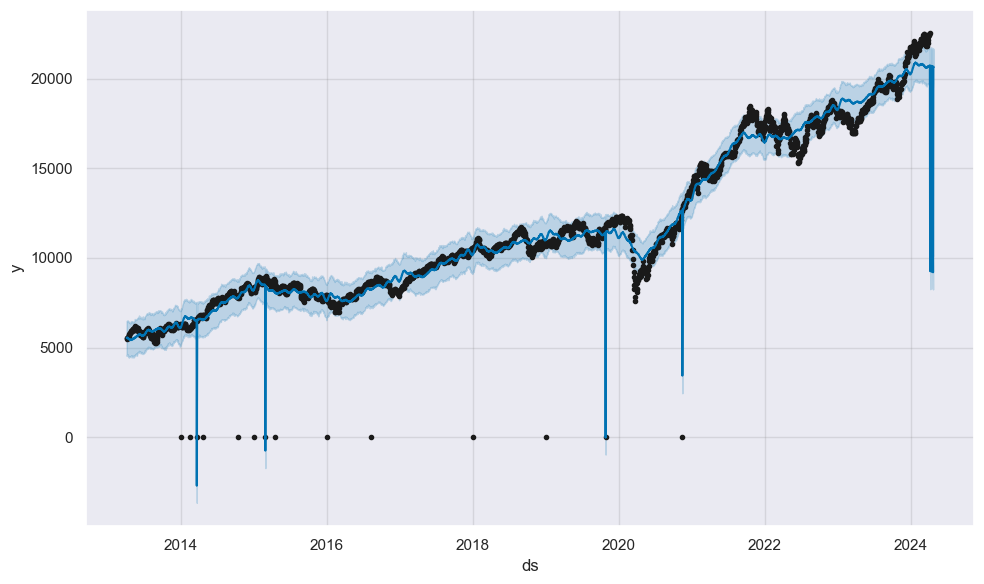

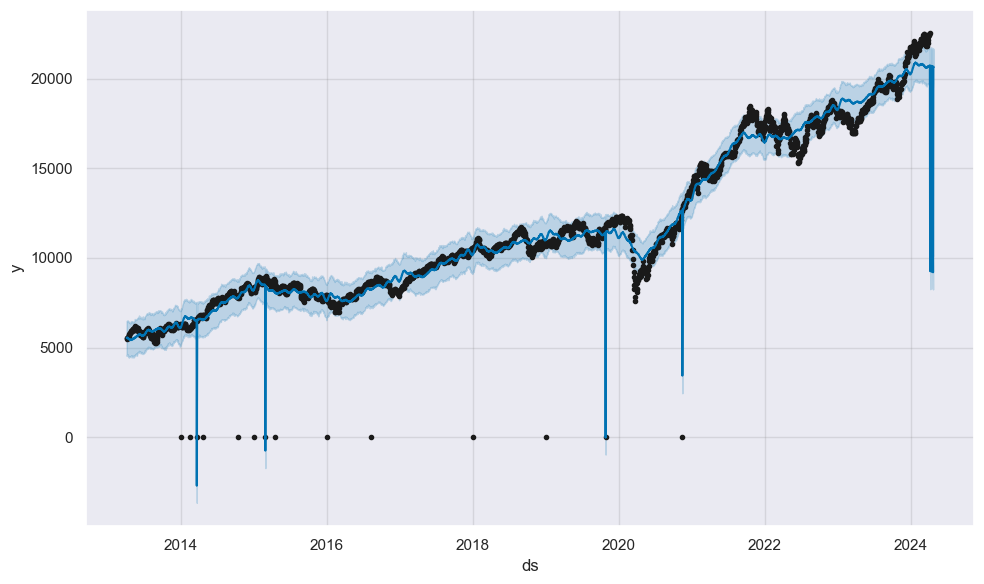

In [64]:
m.plot(forecast)

• Determine if there are any seasonal patterns or cyclical trends in the stock's behavior. 
• Apply time series decomposition techniques to isolate seasonal, trend, and residual 
components. 

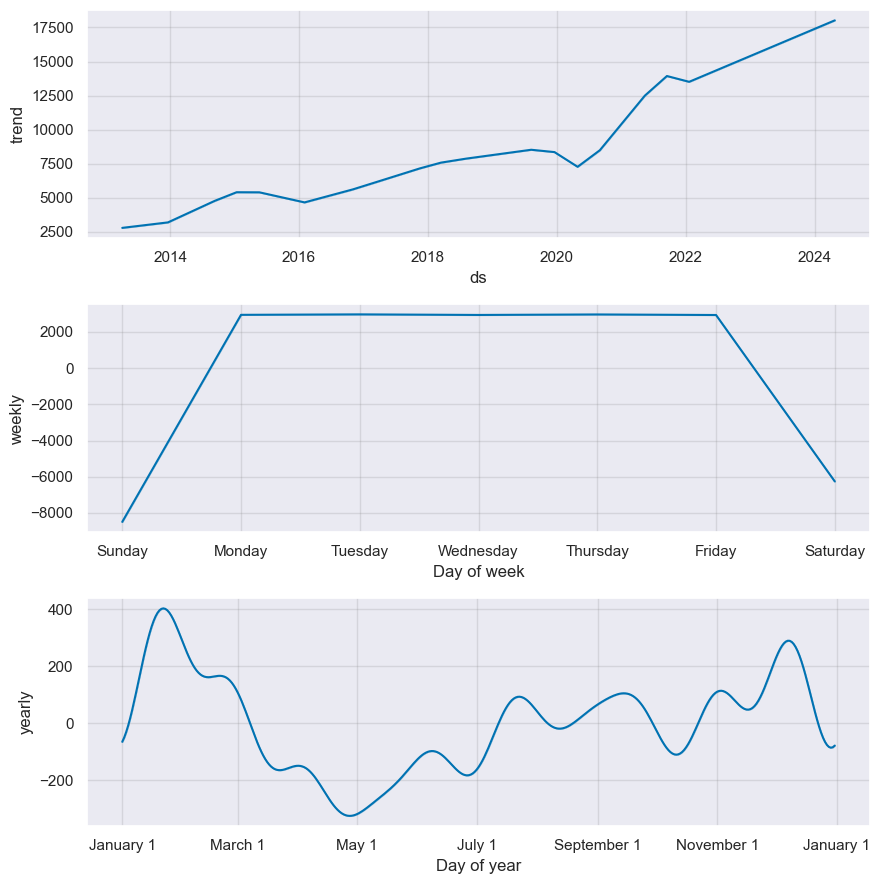

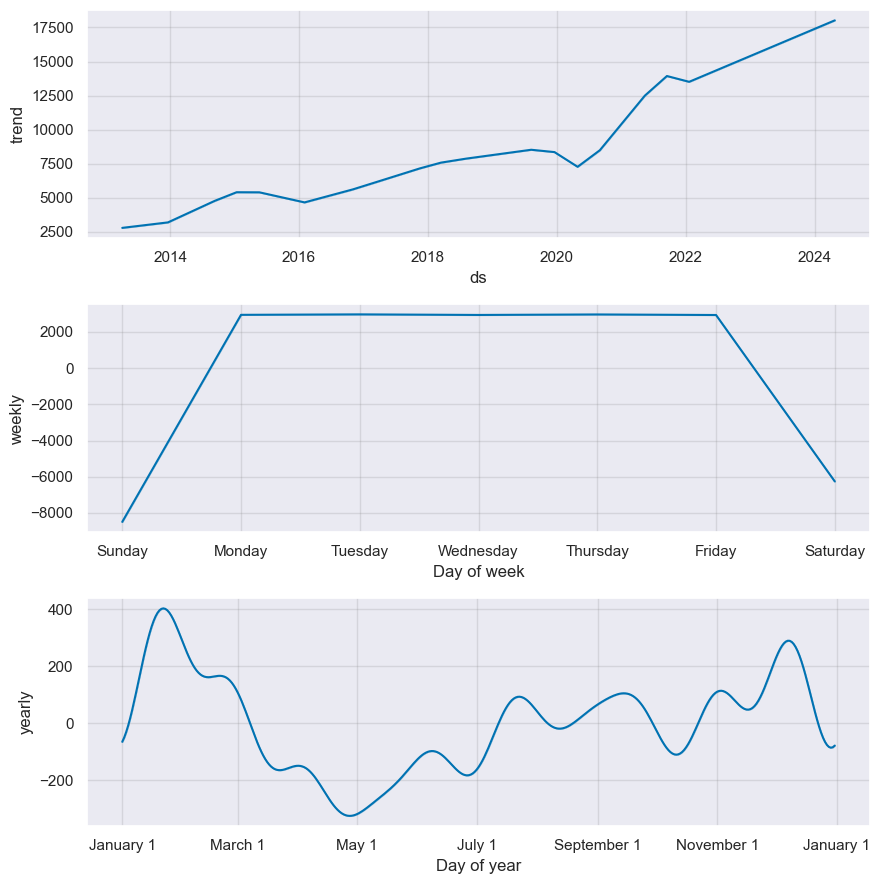

In [65]:
m.plot_components(forecast)

• Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE). 


MAE: 4636.580


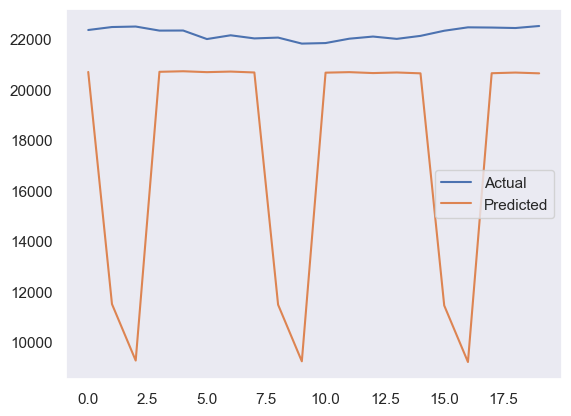

In [66]:
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
y_true = data['Close'][-20:].values
y_pred = forecast['yhat'].values[-20:]
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

RMSE: 6681.783


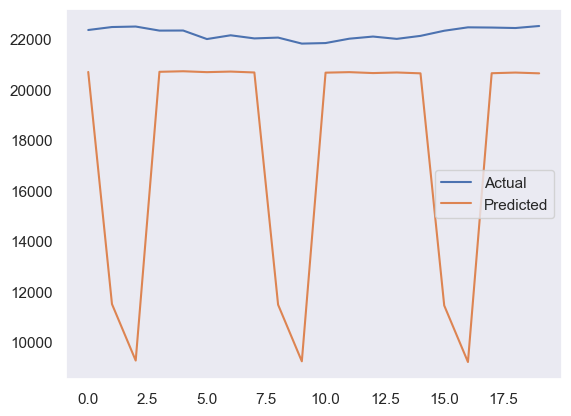

In [67]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
y_true = data['Close'][-20:].values
y_pred = forecast['yhat'].values[-20:]
mae = mean_squared_error(y_true, y_pred)**0.5 ## rmse 
print('RMSE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()